<a href="https://colab.research.google.com/github/Paragjindal01/Data-Mining--437/blob/master/Lab_Assignment_7_Clustering_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COSC 437 Data Mining Lab Assignment 7: Clustering Analysis

## Problem 1 – Hierarchical Clustering on Bird Bones Dataset
There are many kinds of birds: pigeons, ducks, ostriches, penguins… Some are good at flying, others can't fly but run fast. Some swim under water, others wading in shallow pool. Apparently, birds belong to different ecological groups have different appearances: flying birds have strong wings and wading birds have long legs. Their living habits are somewhat reflected in their bones' shapes. As data scientists we may think of examining the underlying relationship between sizes of bones and ecological groups , and recognising birds' ecological groups by their bones' shapes.

![image.png](attachment:3684ff03-40ef-4653-b980-573e951b59b9.png)

There are 420 birds contained in this dataset. Each bird is represented by 10 measurements (*features*):
- Length and Diameter of Humerus
- Length and Diameter of Ulna
- Length and Diameter of Femur
- Length and Diameter of Tibiotarsus
- Length and Diameter of Tarsometatarsus

All measurements are continuous float numbers (mm) with missing values represented by empty strings. The skeletons of this dataset are collections of *Natural History Museum of Los Angeles County*. They belong to 21 orders, 153 genera, 245 species.

### Task 1.1
Read and preprocess the dataset. Notice that there are some data records that have incomplete attributes. We need to remove the incomplete records.

In [28]:
import pandas as pd

# Load and clean the dataset
df = pd.read_csv('/content/sample_data/bird.csv')
df_cleaned = df.dropna()





### Task 1.2
Use the linkage function from `scipy` and build the linkage matrices. Using average as the method and Euclidean distance as the metric. Plot the dendrogram based on the linkage matrix. (There are over 400 data points in the set, so you might want to use `truncate_mode='lastp'` to truncate some small clusters.)

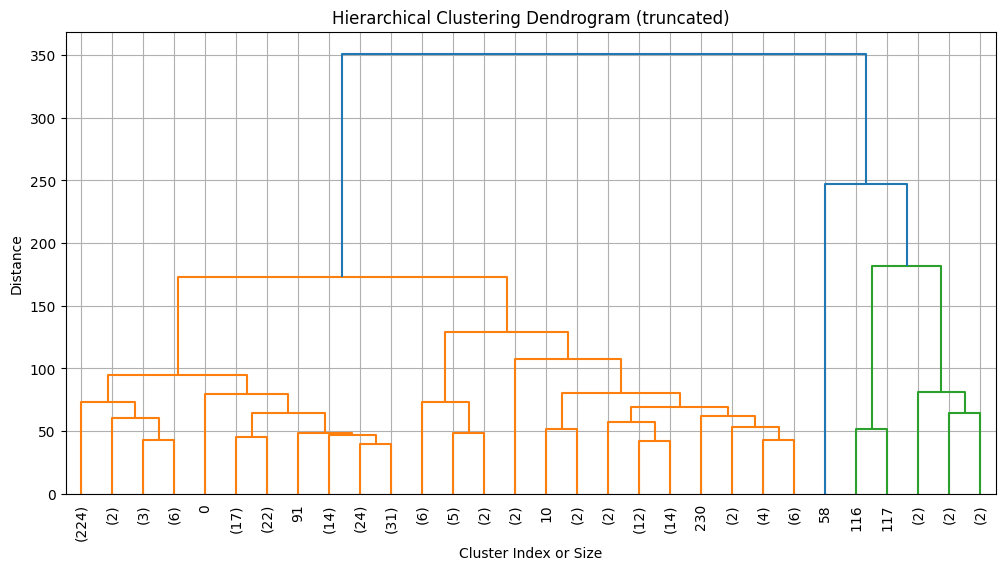

In [29]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Load and clean dataset
df = pd.read_csv('/content/sample_data/bird.csv')
df_cleaned = df.dropna()

# Drop the 'id' column for clustering
X = df_cleaned.drop(columns=['id'])

# Compute linkage matrix using average method and Euclidean distance
linkage_matrix = linkage(X, method='average', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster Index or Size')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


### Task 1.3
Find 3 cuts you think reasonable and draw them on the dendrogram (use `plt.axhline()` method from `matplotlib`).

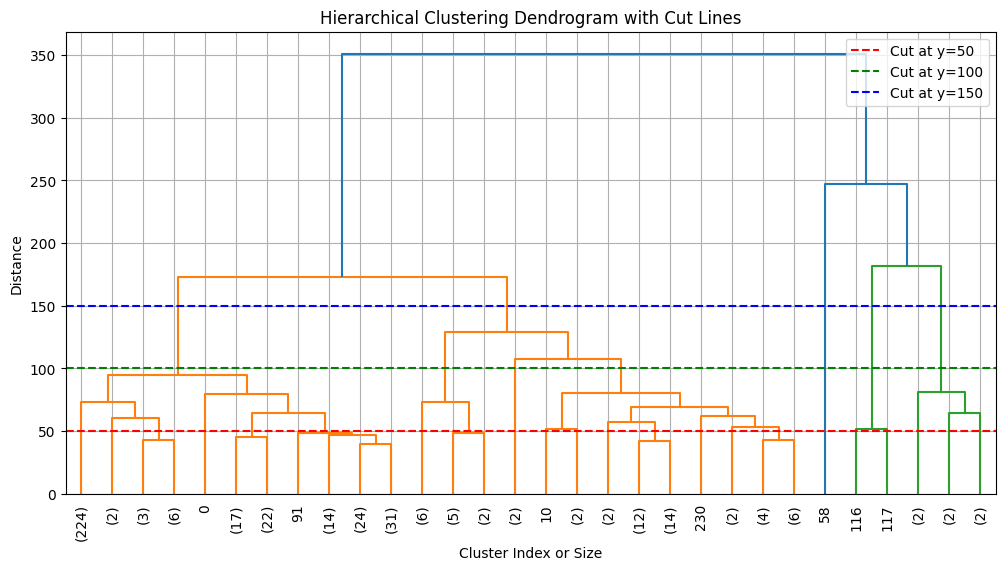

In [30]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Load and clean dataset
df = pd.read_csv('/content/sample_data/bird.csv')
df_cleaned = df.dropna()
X = df_cleaned.drop(columns=['id'])

# Linkage matrix
linkage_matrix = linkage(X, method='average', metric='euclidean')

# Plot dendrogram with 3 horizontal cut lines
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title('Hierarchical Clustering Dendrogram with Cut Lines')
plt.xlabel('Cluster Index or Size')
plt.ylabel('Distance')

# Add horizontal lines to indicate cluster cuts
plt.axhline(y=50, c='red', linestyle='--', label='Cut at y=50')
plt.axhline(y=100, c='green', linestyle='--', label='Cut at y=100')
plt.axhline(y=150, c='blue', linestyle='--', label='Cut at y=150')
plt.legend()
plt.grid(True)
plt.show()


## Problem 2 – K-Means for Image Processing
As we have seen in lecture, K-means algorithm can be used to find the most representative colors in a picture.

### Task 2.1
The following code is provided to you for reading in the image as a `numpy.ndarray`. It uses the computer vision package opencv (`cv2`). Run in Anaconda prompt `conda install opencv` if you don't have it yet. Notice that cv2 will read the three color channels in the order of blue, green, red (BGR), but if we want to visualize the picture with `matplotlib.pyplot`, we have to convert it into red, green, blue (RGB).

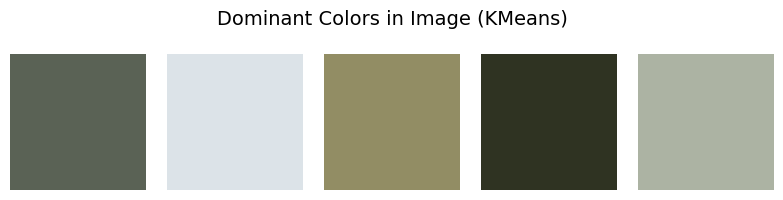

In [31]:
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Load and convert the image to RGB
image_bgr = cv2.imread("kelowna_campus.jpg")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels (rows: pixels, cols: RGB)
pixels = image_rgb.reshape((-1, 3))

# Apply KMeans clustering to find 5 dominant colors
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)

# Get cluster centers (dominant colors)
colors = kmeans.cluster_centers_.astype(int)

# Plot the dominant colors
plt.figure(figsize=(8, 2))
for i, color in enumerate(colors):
    plt.subplot(1, k, i+1)
    plt.imshow([[color / 255]])  # normalize to 0-1 for imshow
    plt.axis('off')
plt.suptitle('Dominant Colors in Image (KMeans)', fontsize=14)
plt.tight_layout()
plt.show()


Answer the following questions:
- What is the data type of the variable `image_rgb`?
- What is the shape of it?
- How is the image data represented?

In [32]:
# ans 1: This is because cv2.imread() and cv2.cvtColor() return images as NumPy arrays
#ans 2
print(image_rgb.shape)
#ans 3:
image_rgb[100, 150]



(400, 600, 3)


array([ 73,  97, 121], dtype=uint8)

### Task 2.2
Reshape the image data so that you can perform clustering based on the RGB color. You should also store the information of the original shape so that you can reshape the processed data back. How many different color are there in the picture (hint: use `np.unique` function)?

In [33]:
import numpy as np

# Store original shape
original_shape = image_rgb.shape  # (height, width, 3)

# Reshape image to a 2D array: each row is a pixel's RGB value
pixels = image_rgb.reshape(-1, 3)  # shape: (height*width, 3)

# Count number of unique RGB colors
unique_colors = np.unique(pixels, axis=0)
num_unique_colors = unique_colors.shape[0]

# Output
print("Original shape:", original_shape)
print("Reshaped shape:", pixels.shape)
print("Number of unique colors in image:", num_unique_colors)


Original shape: (400, 600, 3)
Reshaped shape: (240000, 3)
Number of unique colors in image: 84932


### Task 2.3
Run K-Means on the image data with 2 clusters. Create an RGB image where if the pixel is in cluster 0, the RBG color is (0,0,0), and if the pixel is in cluster 1, the RGB color is (255,255,255). Reshape the data to the image representation, call it `black_white_image`.

In [34]:
from sklearn.cluster import KMeans

# Run K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pixels)
labels = kmeans.labels_  # 0 or 1 for each pixel

# Map clusters to black or white
bw_pixels = np.where(labels.reshape(-1, 1) == 0, [0, 0, 0], [255, 255, 255])  # shape: (num_pixels, 3)

# Reshape back to image shape
black_white_image = bw_pixels.reshape(original_shape)




Run the following code block to display the image:

True

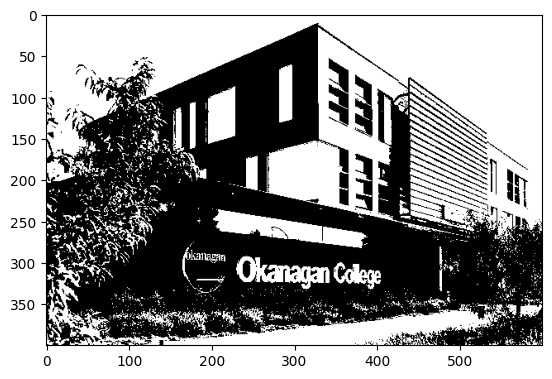

In [35]:
plt.imshow(cv2.cvtColor(black_white_image.astype(np.uint8), cv2.COLOR_BGR2RGB))

## You may also use the following code to save the file:
cv2.imwrite("black_white.jpg", black_white_image)

Run the clustering a few more times, and save them in different jpeg files. Compare the results, do they always look the same? Explain why.

In [36]:
import cv2

for i in range(3):  # Run 3 times
    kmeans = KMeans(n_clusters=2, random_state=None)  # No fixed seed
    kmeans.fit(pixels)
    labels = kmeans.labels_

    bw_pixels = np.where(labels.reshape(-1, 1) == 0, [0, 0, 0], [255, 255, 255])
    black_white_image = bw_pixels.reshape(original_shape).astype(np.uint8)

    # Save each result as a JPEG file
    filename = f'kmeans_bw_result_{i+1}.jpg'
    cv2.imwrite(filename, cv2.cvtColor(black_white_image, cv2.COLOR_RGB2BGR))  # convert to BGR for cv2
    print(f"Saved {filename}")


Saved kmeans_bw_result_1.jpg
Saved kmeans_bw_result_2.jpg
Saved kmeans_bw_result_3.jpg


### Task 2.4
Run K-Means on the image data with 5, 10 and 20 clusters. For each of the results, create an RGB image where the color of every pixel is the color of the centroid. Visualize the results.

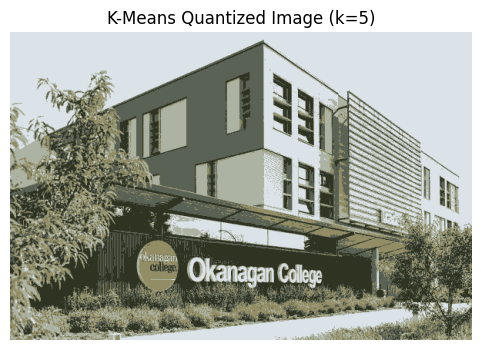

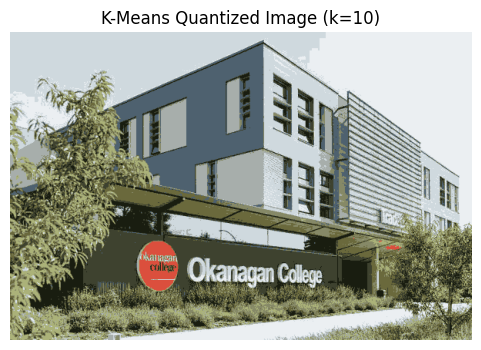

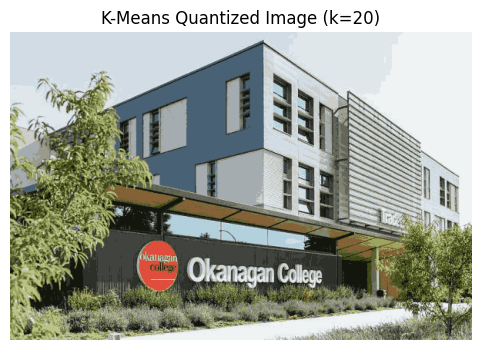

In [37]:
cluster_values = [5, 10, 20]

for k in cluster_values:
    # Run KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)

    # Replace each pixel with its centroid color
    clustered_pixels = kmeans.cluster_centers_[kmeans.labels_].astype(np.uint8)

    # Reshape back to original image shape
    quantized_image = clustered_pixels.reshape(original_shape)

    # Display result
    plt.figure(figsize=(6, 4))
    plt.imshow(quantized_image)
    plt.title(f"K-Means Quantized Image (k={k})")
    plt.axis('off')
    plt.show()


## Submission
To print your assignment, first select Cell -> Run All. Then choose File -> Download as -> HTML. You should submit both the Jupyter Notebook file and theprinted HTML file. Make sure all the images are properly rendered in your HTML.